In [1]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
%matplotlib inline

/Users/baps/Documents/Anaconda3_env/anaconda3/envs/tensorflow_env/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
daily_data = pd.read_csv('data/KaggleV2-May-2016.csv')
daily_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
(daily_data['Gender'] == 'F').value_counts()

True     71840
False    38687
Name: Gender, dtype: int64

In [4]:
print('Age:', sorted(daily_data.Age.unique()))

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


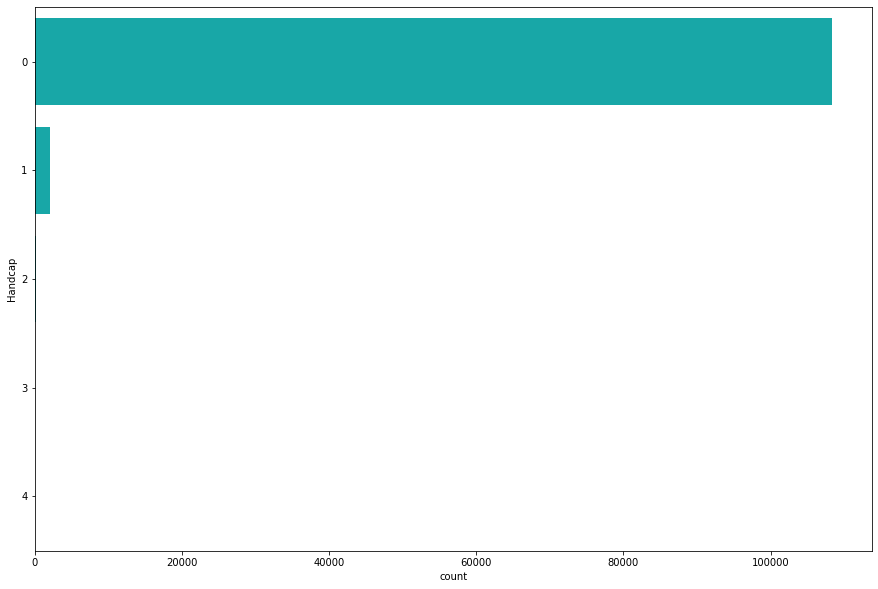

In [5]:
f, ax = plt.subplots(1, 1, figsize=(15, 10))
sn.countplot(y='Handcap', data=daily_data, color='c')

In [6]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(daily_data['Gender'])
daily_data['Gender'] = le.transform(daily_data['Gender'])

le.fit(daily_data['No-show'])
daily_data['No-show'] = le.transform(daily_data['No-show'])

le.fit(daily_data['Neighbourhood'])
daily_data['Neighbourhood'] = le.transform(daily_data['Neighbourhood'])
daily_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,39,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,39,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,45,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,54,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,39,0,1,1,0,0,0,0


In [7]:
#Appointment Date

daily_data['a'] = daily_data.AppointmentDay.apply(lambda x : x.split('T')[0])
daily_data['a'].head(2)

0    2016-04-29
1    2016-04-29
Name: a, dtype: object

In [8]:
#Scheduled date

daily_data['s'] = daily_data.ScheduledDay.apply(lambda x : x.split('T')[0])
daily_data['s'].head(2)

0    2016-04-29
1    2016-04-29
Name: s, dtype: object

In [9]:
daily_data['weekday'] = daily_data.a.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString, '%Y-%m-%d').weekday()])

In [10]:
le.fit(daily_data['weekday'])
daily_data['weekday'] = le.transform(daily_data['weekday'])
daily_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,a,s,weekday
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,39,0,1,0,0,0,0,0,2016-04-29,2016-04-29,0
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,39,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,45,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,54,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,39,0,1,1,0,0,0,0,2016-04-29,2016-04-29,0


In [11]:
#Waiting days

daily_data['a'] = pd.to_datetime(daily_data['a'])
daily_data['s'] = pd.to_datetime(daily_data['s'])

daily_data['Days'] = (daily_data.a - daily_data.s) / np.timedelta64(1, 'D')
print(daily_data.head())

      PatientId  AppointmentID  Gender  ...          s weekday  Days
0  2.987250e+13        5642903       0  ... 2016-04-29       0   0.0
1  5.589978e+14        5642503       1  ... 2016-04-29       0   0.0
2  4.262962e+12        5642549       0  ... 2016-04-29       0   0.0
3  8.679512e+11        5642828       0  ... 2016-04-29       0   0.0
4  8.841186e+12        5642494       0  ... 2016-04-29       0   0.0

[5 rows x 18 columns]


In [12]:
print(sorted(daily_data.Days.unique()))

[-6.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 101.0, 102.0, 103.0, 104.0, 105.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 115.0, 117.0, 119.0, 122.0, 123.0, 125.0, 126.0, 127.0, 132.0, 133.0, 139.0, 142.0, 146.0, 151.0, 155.0, 162.0, 169.0, 176.0, 179.0]


In [13]:
#Drop Negative values

daily_data.drop(daily_data[daily_data.Days < 0].index, inplace=True)

In [14]:
#Drop Negative Age values

daily_data.drop(daily_data[daily_data.Age < 0]. index, inplace=True)

In [15]:
daily_data = daily_data.drop(['a','s','AppointmentDay','ScheduledDay','PatientId','AppointmentID'], axis=1)


In [16]:
daily_data.reset_index()
daily_data.index.name="Index"
daily_data.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,weekday,Days
Index,,,,,,,,,,,,
0,0,62,39,0,1,0,0,0,0,0,0,0.0
1,1,56,39,0,0,0,0,0,0,0,0,0.0
2,0,62,45,0,0,0,0,0,0,0,0,0.0
3,0,8,54,0,0,0,0,0,0,0,0,0.0
4,0,56,39,0,1,1,0,0,0,0,0,0.0


In [17]:
print('Age:',sorted(daily_data.Age.unique()))
print('Gender:', daily_data.Gender.unique())
print('Neighbourhood:', daily_data.Neighbourhood.unique())
print('Scholarship:', daily_data.Scholarship.unique())
print('Hypertension:', daily_data.Hipertension.unique())
print('Diabetes:', daily_data.Diabetes.unique())
print('Alcoholism:', daily_data.Alcoholism.unique())
print('Handcap:', daily_data.Handcap.unique())
print('SMS_received:', daily_data.SMS_received.unique())
print('Weekday:', daily_data.weekday.unique())

Age: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: [0 1]
Neighbourhood: [39 45 54 58 25  1 12 50 15 78  6 77 66 75 44 26 74 29 68 73  8 38 43 37
  2 59 30 42 46 48 69  5 56 63 36 35 79 76 57 62 10 52 18 70  9  3 32 27
 41 13 55  7 47 64 65  4 21 23 22 20 71 53 40 67 14 33 60 11 61 80 16 19
 17 28 72 31 24 49  0 34 51]
Scholarship: [0 1]
Hypertension: [1 0]
Diabetes: [0 1]
Alcoholism: [0 1]
Handcap: [0 1 2 3 4]
SMS_received: [0 1]
Weekday: [0 4 1 5 3 2]


In [18]:
daily_data.shape

(110521, 12)

In [19]:
a = (daily_data['Gender'] == 1).value_counts()
a

False    71836
True     38685
Name: Gender, dtype: int64

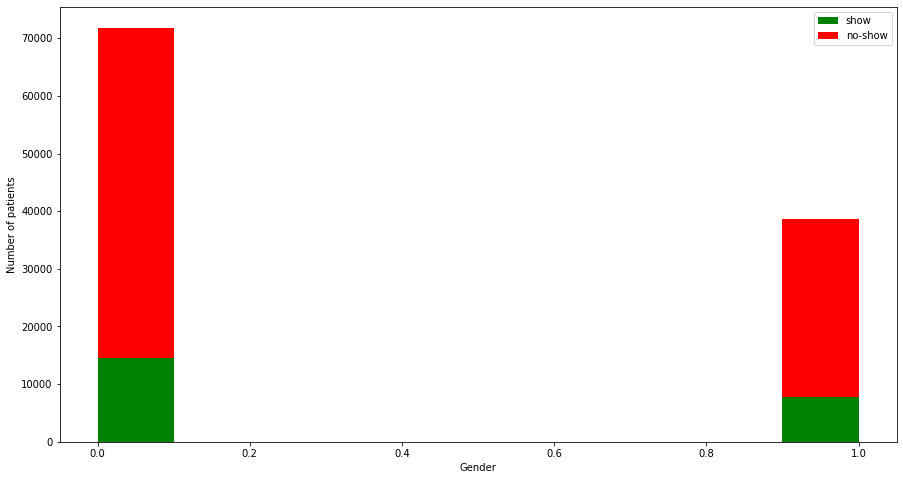

In [20]:
figure = plt.figure(figsize=(15, 8))
plt.hist([daily_data[daily_data['No-show']==1]['Gender'], daily_data[daily_data['No-show']==0]['Gender']], stacked=True, color=['g','r'], label= ['show','no-show'])
plt.xlabel('Gender')
plt.ylabel('Number of patients')
plt.legend()

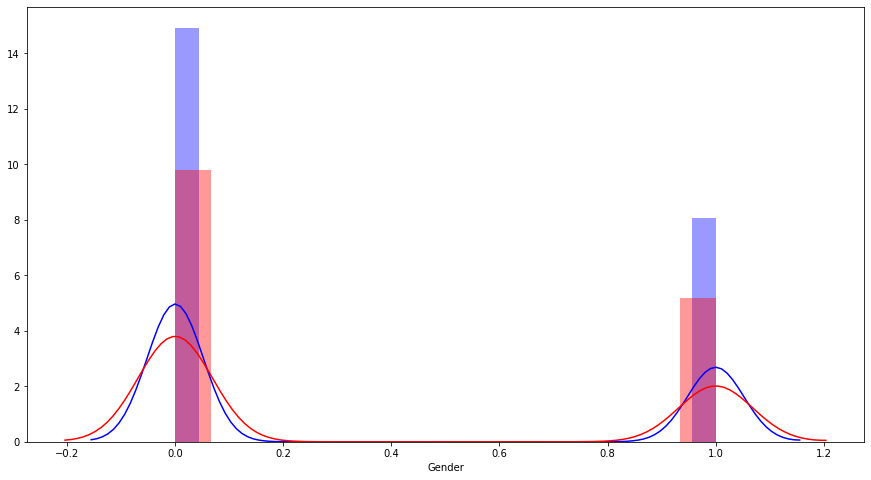

In [21]:
figure = plt.figure(figsize=(15, 8))
sn.distplot(daily_data[daily_data['No-show'] == 0]['Gender'], color='b')
sn.distplot(daily_data[daily_data['No-show'] == 1]['Gender'], color='r')

In [22]:
labels = daily_data.pop("No-show")
labels.shape

(110521,)